In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag

In [63]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [64]:
import statsmodels.formula.api as smf

model = smf.ols(formula= 'sales ~ TV+radio+newspaper', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        11:11:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X = df.drop(['sales', 'Unnamed: 0'], axis = 1)

Y = df['sales']

In [66]:
# Scaling means subtracting value from a mean value of a column and dividing by std deviation of the column
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [67]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=3,test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [68]:
model = LinearRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print('mean squared error is : ', mean_squared_error(pv, test_y))
print('R2 score is : ', r2_score(pv, test_y))

mean squared error is :  4.07161263291103
R2 score is :  0.8123330831970897


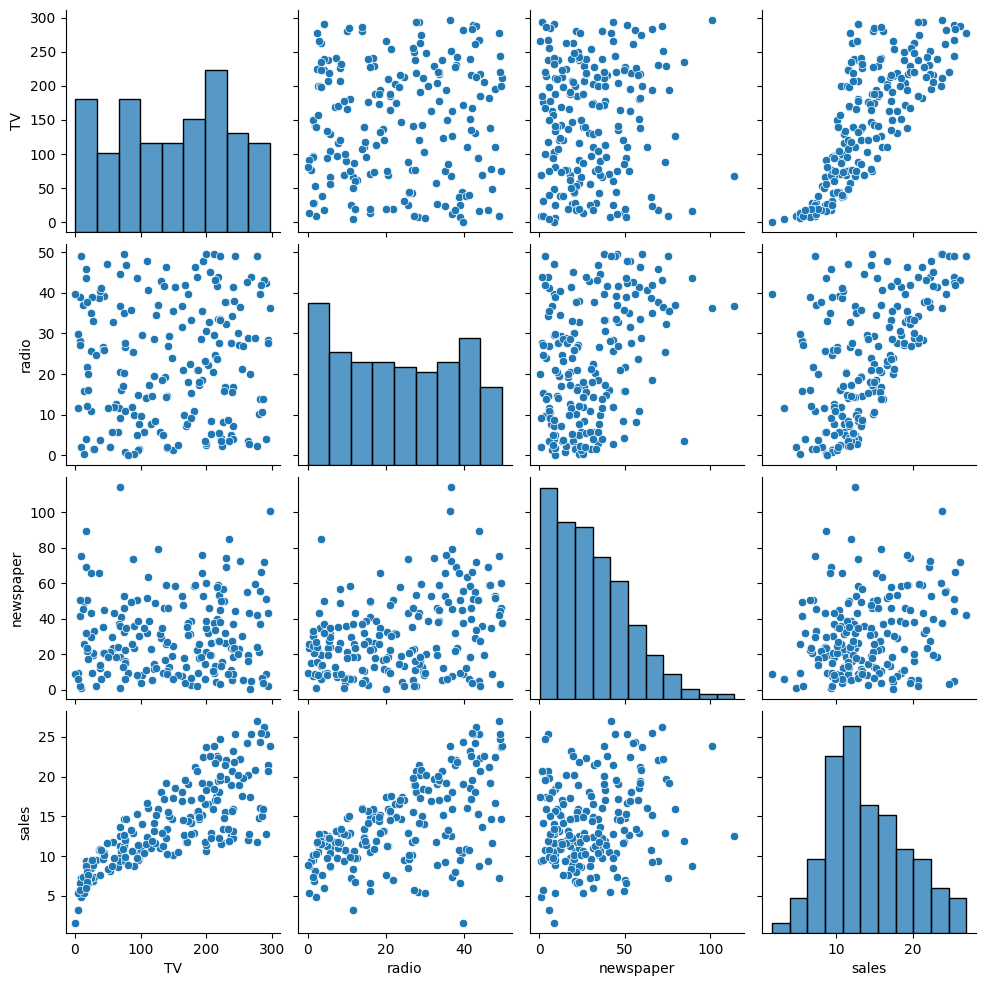

In [69]:
#1. presence of linearity - which we can see by plotting the graph.
df.drop('Unnamed: 0', axis=1, inplace=True)
sns.pairplot(data = df)
plt.show()

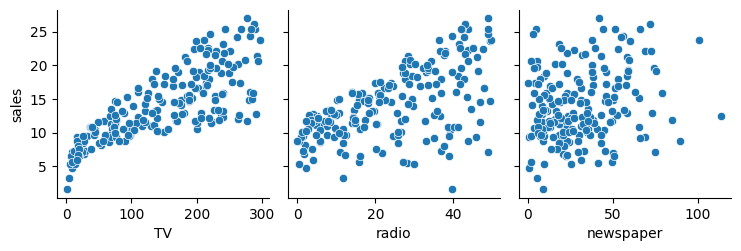

In [70]:
#We can see TV and Radio have good linear relationship with sales but newspaper has no linear relationship with sales
sns.pairplot(data = df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'])
plt.show()

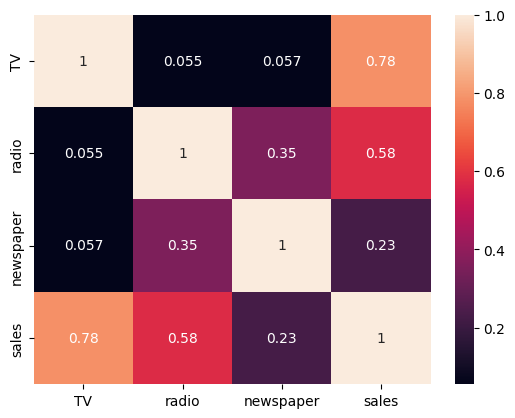

In [71]:
#TV and Radio have correlation with sales as .78 and .58 but newspaper has only .23
#If we drop newspaper our model will be good one
sns.heatmap(df.corr(), annot=True, cbar=True)
plt.show()

In [72]:
#2. Mean of residual should be close to zero.
# As the mean of the residual is close to zero we can rely on this model
Residuals = test_y.values - pv
print('mean of residual is : ', Residuals.mean())


mean of residual is :  -0.07310647557802451


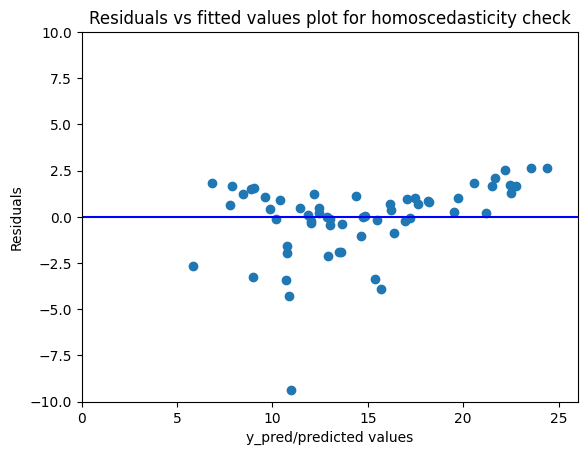

In [74]:
# 3. check for homoscedasticity. Residual should have equal or almost equal varainces accross regression line

# We have plotted error terms against predicted values, if there is definite pattern like linear, quadratic or funnel shaped then homoscedasticity is not present
# in this case we have a scattered data so homoscedasticity is absent and heteroscedasticity is present so our model is reliable.

p = plt.scatter(pv, Residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [77]:
# Gold feld quandt test

# H0 : Error terms are homoscedasticistic
# H1 : Error terms are not homoscedasticistic/heteroscedasticistic

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Residuals, test_x)
lzip(name, test)

# If p-value is lesser than 0.05 we reject the null hypotesis or we accept the alternate hypothesis
# So in our case residuals are heteroscedasticistic so we accept the model

[('F statistic', 2.240030950605881), ('p-value', 0.020225032730383438)]

<ipython-input-78-abbeaf032da0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(Residuals,kde=True)


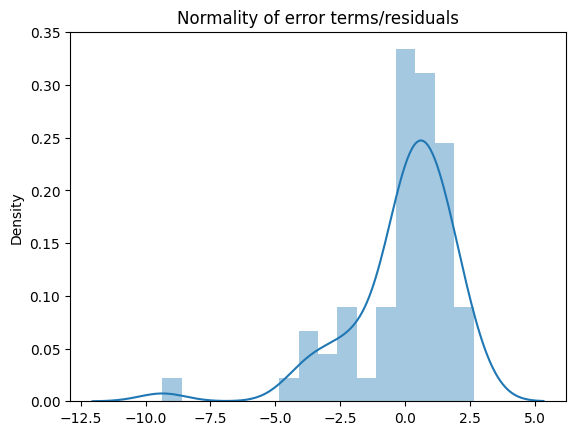

In [78]:
# 4. check for normality of error terms. If residual follows normal distibution curve model is good.

p = sns.distplot(Residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

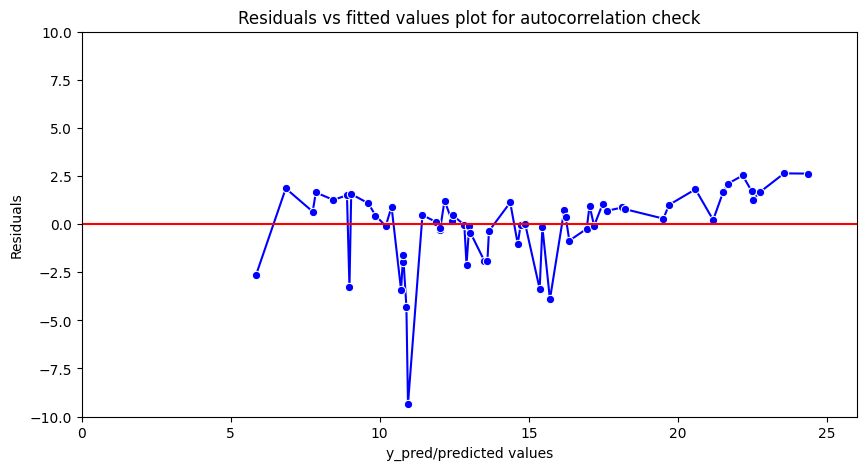

In [79]:
# 6. check for auto correlation between residuals. if there is no correlation between variable then the model is good.

#There should not be autocorrelation in the data so that error terms should not follow any pattern.

plt.figure(figsize=(10,5))
p = sns.lineplot(x=pv,y=Residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

# As we can see the error terms are scattered so autocorrelation does not exist.

In [83]:
# There is another check for autocorrelation called LJung box test
# H0 : Autocorrelation is absent
# H1 : Autocorrelation is present
# If p_value is less than 0.05 we reject null hypothesis and accept alternate hypothesis

diag.acorr_ljungbox(Residuals , lags = 40)['lb_pvalue']
min(diag.acorr_ljungbox(Residuals , lags = 40)['lb_pvalue'])

# As p_value is greater than 0.05 we accept the H0

0.18704407679582333

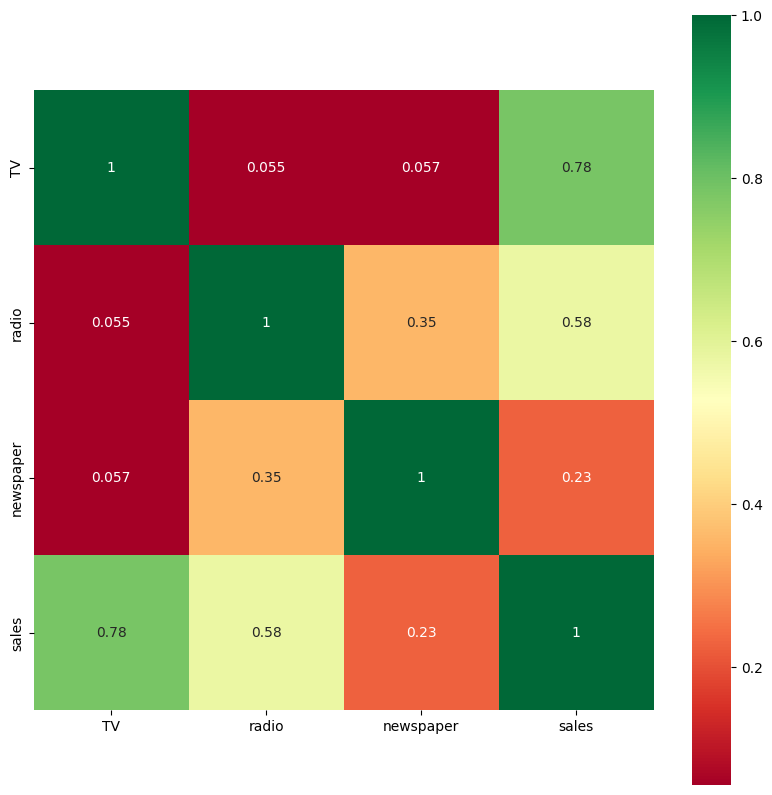

In [86]:
# 5. No perfect multico-linearity of residuals
# Multi colinearity refers to the extent to which independent variables are correlated.
# Multi colinearity affects the co efficients and the p_values but does not influence the predictions or precision of predictions.
# If our primary goal is prediction we do not bother about multicolinearity

plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap